<a href="https://colab.research.google.com/github/ZefraAlseif/Project1_Wine_Network/blob/main/ClassificationModel_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adapting the original wine data to a regression model and classification model

In [ ]:
#@title Data as Numpy Arrays
import matplotlib.pyplot as plt
import numpy as np
# This time we need to also import pandas
import pandas as pd
from io import StringIO

# Read in white wine data
# Uses PANDAS (pd) to create a PANDAS DataFrame Object:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')

# Read in red wine data
# Uses PANDAS (pd) to create a PANDAS DataFrame Object:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

red['type'] = 1
white['type'] = 0

wines = red.append(white, ignore_index = True)

# Import SKLEARN
import sklearn

# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
# Specify the data -
X1 = wines.iloc[:, 0:11]
X2 = wines.iloc[:,12]
X = pd.concat([X1,X2],axis = 1)

y = np.ravel(wines.quality)

# Splitting the data set for training and validating - Done with SKLEARN
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.25, random_state = 45)

# Converting X_train & X_test DataFrame s to TF sensors
# Will use NumPy, TF, & Keras after this
# import tensorflow as tf

Xtrain = X_train.to_numpy()
X_valid = X_valid.to_numpy()

X_valid
# In reality:
# [1] ALL THE Xtrain patterns (with their y_train targets)
# will be used for TRAINING ([TR]), as Xtrain & y_train
# [2] MOST OF THE X_valid patterns (and their y_valid targets)
# will be used for VALIDATION ([TT]), as X_val & y_val
# BUT WE WILL SET ASIDE THE LAST 10 for "testing" ([TS])
# as X_tst & y_tst

# Retain the first 1615 patterns for validation ([TT])
Xval = X_valid[:1615]
Xval.shape

# and now set aside the last 10 for test
Xtst = X_valid[1615:]
Xtst.shape

# Same for the corresponding targets
# Retain the first 1615 for validation ([TT])
y_val = y_valid[:1615]
y_val.shape

y_tst = y_valid[1615:]
y_tst.shape 
y_tst

# Now, in addition, create the targets as one-hot-encoded 4 quality levels
# We will track these few targets through the conversion process
y_train[272:283]

# Function create rank-1 arrays where 3,4,5,6,7,8,9 are mapped to 1 or 2 or 3 or 4 
def to_4cs(x):
  lx = len(x)
  results = np.zeros(lx)
  for i in range(lx):
    # print("start")
    xa = x[i];
    if xa <= 3:
      results[i] = 1
    elif xa <= 6:
      results[i] = 2
    elif xa <= 8:
      results[i] = 3
    else:
      results[i] = 4
    # results [i, label] = 1
  results = results.astype(int)
  return results

train_labels = to_4cs(y_train)
val_labels = to_4cs(y_val)
tst_labels = to_4cs(y_tst)

# Let's verify that the training targets that we are tracking 
# were converted to levels (1 = BAD; 2 = Medium; 3 = GOOD; 4- Excellent) correctly:
train_labels[272:283]

# Now, one shot encoding of all 3 target arrays
# define a function to do the 

def to_one_hot(labels, dimension = 4):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels-1):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_val_labels = to_one_hot(val_labels)
one_hot_tst_labels = to_one_hot(tst_labels)

#Let's verify that the training targets we have tracked were
# one-hot encoded correctly
Xtrain.shape

# SO, AFTER EXECUTING THIS CELL, YOU WILL HAVE:
# FOR TRAINING:
# Xtrain (4872, 12)...y_train (4872,)...train_labels(4872,)....one_hot_train_labels (4872,4)
# FOR VALIDATING:
# Xval (1615, 12)...y_val (1615,)...val_labels(1615,)...one_hot_val_labels (1615,4)
# FOR TESTING:
# Xtst (10, 12)...y_tst (10,)...tst_labels(10,)... one_hot_tst_labels (10,4)
# PLEASE DO NOT CHANGE THE NAMES OF THESE VARIABLES (So that instructor can use them)


(4872, 12)

# III.0 Estimating

In [ ]:
import copy
one_hot_val_labels_copy = copy.copy(one_hot_val_labels)
np.random.shuffle(one_hot_val_labels_copy)
hits_array = np.array(one_hot_val_labels) == np.array(one_hot_val_labels_copy)
print("Accuracy using one_hot_val_labels as set: ",hits_array.mean())
val_labels_copy = copy.copy(val_labels)
np.random.shuffle(val_labels_copy)
hits_array = np.array(val_labels) == np.array(val_labels_copy)
print("Accuracy using val_labels as set: ",hits_array.mean())

Accuracy using one_hot_val_labels as set:  0.8309597523219814
Accuracy using val_labels as set:  0.6501547987616099


# III.1 Classification Model 1 (clasmodl1)

In [ ]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_clasmodl1():
  clasmodl1 = keras.Sequential(
      [
        layers.Dense(8, activation = 'relu'),
        layers.Dense(4, activation = 'softmax')
      ]
)
  clasmodl1.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
  return clasmodl1

clasmodl1 = build_clasmodl1()
history_clasmodl1 = clasmodl1.fit(x = Xtrain,y = one_hot_train_labels, batch_size = 32, epochs = 25, verbose = 2, validation_data = (Xval,one_hot_val_labels), validation_freq = 1)

clasmodl1.summary()

Epoch 1/25
153/153 - 1s - loss: 1.7405 - accuracy: 0.6798 - val_loss: 1.2199 - val_accuracy: 0.6099 - 873ms/epoch - 6ms/step
Epoch 2/25
153/153 - 0s - loss: 0.8309 - accuracy: 0.7798 - val_loss: 0.8718 - val_accuracy: 0.7802 - 251ms/epoch - 2ms/step
Epoch 3/25
153/153 - 0s - loss: 0.7388 - accuracy: 0.7950 - val_loss: 0.7520 - val_accuracy: 0.7870 - 259ms/epoch - 2ms/step
Epoch 4/25
153/153 - 0s - loss: 0.6892 - accuracy: 0.7999 - val_loss: 0.7372 - val_accuracy: 0.7833 - 265ms/epoch - 2ms/step
Epoch 5/25
153/153 - 0s - loss: 0.6402 - accuracy: 0.8007 - val_loss: 0.7509 - val_accuracy: 0.7839 - 269ms/epoch - 2ms/step
Epoch 6/25
153/153 - 0s - loss: 0.6152 - accuracy: 0.8001 - val_loss: 0.6773 - val_accuracy: 0.7833 - 257ms/epoch - 2ms/step
Epoch 7/25
153/153 - 0s - loss: 0.5981 - accuracy: 0.7968 - val_loss: 0.6442 - val_accuracy: 0.7833 - 260ms/epoch - 2ms/step
Epoch 8/25
153/153 - 0s - loss: 0.5744 - accuracy: 0.8044 - val_loss: 0.6263 - val_accuracy: 0.7833 - 256ms/epoch - 2ms/step


## Plots of Classification Model 1 and Final Values

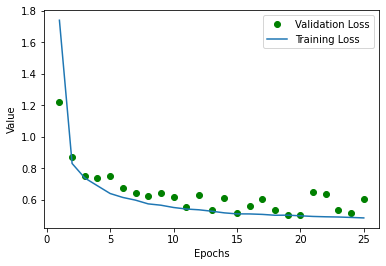

Final Training loss:  0.4851763844490051 
Final Training Accuracy:  0.8037766814231873
Final Validation loss:  0.6021521687507629 
Final Validation Accuracy:  0.7826625108718872


In [ ]:
# Plot the validation and training loss
plt.plot(range(1, len(history_clasmodl1.history['val_loss']) + 1), history_clasmodl1.history['val_loss'], 'go', label = "Validation Loss")
plt.plot(range(1, len(history_clasmodl1.history['loss']) + 1), history_clasmodl1.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_clasmodl1.history['loss'][-1],"\nFinal Training Accuracy: ", history_clasmodl1.history['accuracy'][-1])
print("Final Validation loss: ",history_clasmodl1.history['val_loss'][-1],"\nFinal Validation Accuracy: ", history_clasmodl1.history['val_accuracy'][-1])

# III.2 Classification Model 2 (clasmodl2)

In [ ]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_clasmodl2():
  clasmodl2 = keras.Sequential(
      [
        layers.Dense(512, activation = 'relu'),
        layers.Dense(100, activation = 'relu'),
        layers.Dense(30, activation = 'relu'),
        layers.Dense(100, activation = 'relu'),
        layers.Dense(4, activation = 'softmax')
      ]
)
  clasmodl2.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
  return clasmodl2

clasmodl2 = build_clasmodl2()
history_clasmodl2 = clasmodl2.fit(x = Xtrain,y = one_hot_train_labels, batch_size = 128, epochs = 200, verbose = 2, validation_data = (Xval,one_hot_val_labels), validation_freq = 1)

#clasmodl2.summary()

Epoch 1/200
39/39 - 1s - loss: 0.3468 - accuracy: 0.7865 - val_loss: 0.3229 - val_accuracy: 0.7839 - 1s/epoch - 29ms/step
Epoch 2/200
39/39 - 0s - loss: 0.2663 - accuracy: 0.8038 - val_loss: 0.6163 - val_accuracy: 0.7839 - 216ms/epoch - 6ms/step
Epoch 3/200
39/39 - 0s - loss: 0.2707 - accuracy: 0.8038 - val_loss: 0.2963 - val_accuracy: 0.7851 - 215ms/epoch - 6ms/step
Epoch 4/200
39/39 - 0s - loss: 0.2550 - accuracy: 0.8032 - val_loss: 0.2731 - val_accuracy: 0.7839 - 175ms/epoch - 4ms/step
Epoch 5/200
39/39 - 0s - loss: 0.2556 - accuracy: 0.8038 - val_loss: 0.3589 - val_accuracy: 0.7839 - 175ms/epoch - 4ms/step
Epoch 6/200
39/39 - 0s - loss: 0.2538 - accuracy: 0.8038 - val_loss: 0.2732 - val_accuracy: 0.7839 - 166ms/epoch - 4ms/step
Epoch 7/200
39/39 - 0s - loss: 0.2509 - accuracy: 0.8038 - val_loss: 0.2726 - val_accuracy: 0.7839 - 214ms/epoch - 5ms/step
Epoch 8/200
39/39 - 0s - loss: 0.2458 - accuracy: 0.8036 - val_loss: 0.3324 - val_accuracy: 0.7839 - 187ms/epoch - 5ms/step
Epoch 9/20

## Plots of Classification Model 2 and Final Values

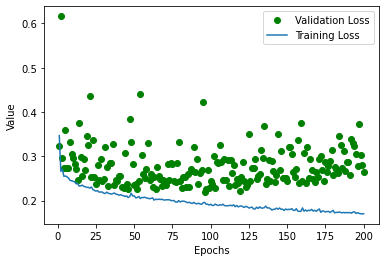

Final Training loss:  0.17043213546276093 
Final Training Accuracy:  0.8442118167877197
Final Validation loss:  0.26551443338394165 
Final Validation Accuracy:  0.7950464487075806


In [ ]:
# Plot the validation and training loss
plt.plot(range(1, len(history_clasmodl2.history['val_loss']) + 1), history_clasmodl2.history['val_loss'], 'go', label = "Validation Loss")
plt.plot(range(1, len(history_clasmodl2.history['loss']) + 1), history_clasmodl2.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_clasmodl2.history['loss'][-1],"\nFinal Training Accuracy: ", history_clasmodl2.history['accuracy'][-1])
print("Final Validation loss: ",history_clasmodl2.history['val_loss'][-1],"\nFinal Validation Accuracy: ", history_clasmodl2.history['val_accuracy'][-1])

# III.3 Classification Model 3 (clasmodl3)

In [ ]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_clasmodl3():
  clasmodl3 = keras.Sequential(
      [
        layers.Dense(512, activation = 'relu'),
        layers.Dense(100, activation = 'relu'),
        layers.Dense(30, activation = 'relu'),
        layers.Dense(100, activation = 'relu'),
        layers.Dense(4, activation = 'softmax')
      ]
)
  clasmodl3.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
  return clasmodl3

clasmodl3 = build_clasmodl3()
history_clasmodl3 = clasmodl3.fit(x = Xtrain,y = one_hot_train_labels, batch_size = 128, epochs = 50, verbose = 2, validation_data = (Xval,one_hot_val_labels), validation_freq = 1)

#clasmodl3.summary()

Epoch 1/50
39/39 - 1s - loss: 0.3252 - accuracy: 0.8040 - val_loss: 0.3805 - val_accuracy: 0.7839 - 1s/epoch - 28ms/step
Epoch 2/50
39/39 - 0s - loss: 0.2651 - accuracy: 0.8038 - val_loss: 0.3199 - val_accuracy: 0.7839 - 213ms/epoch - 5ms/step
Epoch 3/50
39/39 - 0s - loss: 0.2595 - accuracy: 0.8030 - val_loss: 0.2774 - val_accuracy: 0.7839 - 185ms/epoch - 5ms/step
Epoch 4/50
39/39 - 0s - loss: 0.2588 - accuracy: 0.8038 - val_loss: 0.3251 - val_accuracy: 0.7839 - 219ms/epoch - 6ms/step
Epoch 5/50
39/39 - 0s - loss: 0.2522 - accuracy: 0.8036 - val_loss: 0.2878 - val_accuracy: 0.7839 - 194ms/epoch - 5ms/step
Epoch 6/50
39/39 - 0s - loss: 0.2515 - accuracy: 0.8040 - val_loss: 0.2677 - val_accuracy: 0.7839 - 181ms/epoch - 5ms/step
Epoch 7/50
39/39 - 0s - loss: 0.2453 - accuracy: 0.8036 - val_loss: 0.3369 - val_accuracy: 0.7839 - 177ms/epoch - 5ms/step
Epoch 8/50
39/39 - 0s - loss: 0.2491 - accuracy: 0.8036 - val_loss: 0.2698 - val_accuracy: 0.7839 - 174ms/epoch - 4ms/step
Epoch 9/50
39/39 -

## Plots for Classification Model 3 and Final Values

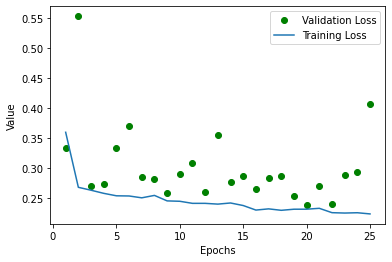

Final Training loss:  0.22380802035331726 
Final Training Accuracy:  0.8023399114608765
Final Validation loss:  0.4068959951400757 
Final Validation Accuracy:  0.7839009165763855


In [ ]:
# Plot the validation and training loss
plt.plot(range(1, len(history_clasmodl3.history['val_loss']) + 1), history_clasmodl3.history['val_loss'], 'go', label = "Validation Loss")
plt.plot(range(1, len(history_clasmodl3.history['loss']) + 1), history_clasmodl3.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_clasmodl3.history['loss'][-1],"\nFinal Training Accuracy: ", history_clasmodl3.history['accuracy'][-1])
print("Final Validation loss: ",history_clasmodl3.history['val_loss'][-1],"\nFinal Validation Accuracy: ", history_clasmodl3.history['val_accuracy'][-1])

## Predicting the Output

In [ ]:
# Predicting the activation and inputting it alongside the targets
# into the predict_table 
from pandas.core.arrays.sparse import dtype
predict_labels = np.around(clasmodl3.predict(Xtst))
predict_table = pd.DataFrame(Xtst)
predict_table["activation"] = [predict_labels[0,:],predict_labels[1,:],predict_labels[2,:],predict_labels[3,:],predict_labels[4,:],predict_labels[5,:],predict_labels[6,:],predict_labels[7,:],predict_labels[8,:],predict_labels[9,:]]
predict_table["target"] = [one_hot_tst_labels[0,:],one_hot_tst_labels[1,:],one_hot_tst_labels[2,:],one_hot_tst_labels[3,:],one_hot_tst_labels[4,:],one_hot_tst_labels[5,:],one_hot_tst_labels[6,:],one_hot_tst_labels[7,:],one_hot_tst_labels[8,:],one_hot_tst_labels[9,:]]

# Checking which activations match their target i.e accuracy
check = np.empty((10,4), dtype=bool)
hits = []
for i in range(len(predict_labels)):
  check[i,:] = predict_labels[i,:] == one_hot_tst_labels[i,:] 
  if (np.count_nonzero(check[i,:]) ==4):
    hits.append("Hit")
  else:
    hits.append("Missed")
predict_table["accuracy"] = hits

# Renaming the columns of the table
predict_table.columns.values[0] = "f1"
predict_table.columns.values[1] = "f2"
predict_table.columns.values[2] = "f3"
predict_table.columns.values[3] = "f4"
predict_table.columns.values[4] = "f5"
predict_table.columns.values[5] = "f6"
predict_table.columns.values[6] = "f7"
predict_table.columns.values[7] = "f8"
predict_table.columns.values[8] = "f9"
predict_table.columns.values[9] = "f10"
predict_table.columns.values[10] = "f11"
predict_table.columns.values[11] = "f12"
display(predict_table)